# Notebook EDA

## Partie 1 : Analyse graphique des données (EDA) 

**A Faire :**
- Diagrammes de répartition des données (type gaussienne sur les données)
- Vérification du nombre de données, si plusieurs données sont peu représentés (<3%) alors regrouper dans une seule et même catégorie, 1 pie chart avant/apres
- Nettoyage des données manquantes, encodage (OneHot, dictionnaire ou Sklearn Encoder)
- Boites à moustache si données extrêmes avec commentaire (que prévoyez vous pour ces individus)
- Heatmap + observations sur les corrélations si pertinent

In [62]:
#importer des librairies
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import sklearn as sk;
import matplotlib as mat
import seaborn as sns
import math
import scipy

In [63]:
seasons_stats = pd.read_csv("seasons_stats.csv") #,sep=';',decimal=','

In [64]:
#seasons_stats.drop(['Unnamed: 0'], axis='columns', inplace = True)
seasons_stats.head()

,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,...,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0
1,1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,...,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0
2,2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,...,0.698,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192.0,438.0
3,3,1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,...,0.559,NaN,NaN,NaN,20.0,NaN,NaN,NaN,29.0,63.0
4,4,1950.0,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,NaN,...,0.548,NaN,NaN,NaN,20.0,NaN,NaN,NaN,27.0,59.0


In [65]:
seasons_stats.tail(10)

,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
24681,24681,2017.0,Delon Wright,PG,24.0,TOR,27.0,0.0,446.0,15.0,...,0.764,16.0,32.0,48.0,57.0,27.0,11.0,25.0,31.0,150.0
24682,24682,2017.0,James Young,SG,21.0,BOS,29.0,0.0,220.0,10.0,...,0.667,6.0,20.0,26.0,4.0,10.0,2.0,4.0,15.0,68.0
24683,24683,2017.0,Joe Young,PG,24.0,IND,33.0,0.0,135.0,11.4,...,0.733,1.0,16.0,17.0,15.0,4.0,0.0,5.0,5.0,68.0
24684,24684,2017.0,Nick Young,SG,31.0,LAL,60.0,60.0,1556.0,14.1,...,0.856,25.0,112.0,137.0,58.0,37.0,14.0,36.0,137.0,791.0
24685,24685,2017.0,Thaddeus Young,PF,28.0,IND,74.0,74.0,2237.0,14.9,...,0.523,131.0,318.0,449.0,122.0,114.0,30.0,96.0,135.0,814.0
24686,24686,2017.0,Cody Zeller,PF,24.0,CHO,62.0,58.0,1725.0,16.7,...,0.679,135.0,270.0,405.0,99.0,62.0,58.0,65.0,189.0,639.0
24687,24687,2017.0,Tyler Zeller,C,27.0,BOS,51.0,5.0,525.0,13.0,...,0.564,43.0,81.0,124.0,42.0,7.0,21.0,20.0,61.0,178.0
24688,24688,2017.0,Stephen Zimmerman,C,20.0,ORL,19.0,0.0,108.0,7.3,...,0.600,11.0,24.0,35.0,4.0,2.0,5.0,3.0,17.0,23.0
24689,24689,2017.0,Paul Zipser,SF,22.0,CHI,44.0,18.0,843.0,6.9,...,0.775,15.0,110.0,125.0,36.0,15.0,16.0,40.0,78.0,240.0
24690,24690,2017.0,Ivica Zubac,C,19.0,LAL,38.0,11.0,609.0,17.0,...,0.653,41.0,118.0,159.0,30.0,14.0,33.0,30.0,66.0,284.0


In [66]:
seasons_stats.shape

(24691, 53)

In [75]:
seasons_stats2 = seasons_stats[['Player','Pos','G','ORB','DRB','AST','PTS']]

In [76]:
seasons_stats2.isna().sum()

Player      67
Pos         67
G           67
ORB       3894
DRB       3894
AST         67
PTS         67
dtype: int64

### 1.1) Diagrammes de répartition des données (type gaussienne sur les données)
- **Retourne le diagramme du % de joueurs par poste**

In [67]:
seasons_stats.Pos.value_counts()

PF       4966
SG       4811
C        4759
SF       4699
PG       4648
G         139
F         123
F-C        81
G-F        79
F-G        60
C-F        35
C-PF       33
SF-SG      30
PG-SG      28
PF-C       27
SG-PG      27
SG-SF      26
PF-SF      25
SF-PF      21
SG-PF       3
C-SF        2
PG-SF       1
SF-PG       1
Name: Pos, dtype: int64

<ipython-input-68-ebc99bf903a8>:6: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  ax1.pie(x=type_diag, explode=(0,0.1), labels=['PG','SG','PF','SF' 'C'], autopct='%1.1f%%', startangle=90)


ValueError: 'label' must be of length 'x'

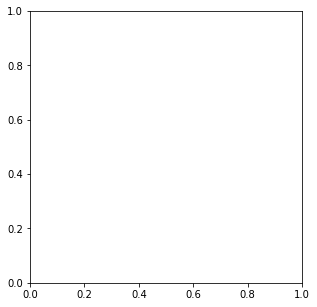

In [68]:
type_diag=seasons_stats.Pos.value_counts()/seasons_stats.Pos.value_counts().sum()
#pays_diag=films.country.value_counts()/films.country.value_counts().sum()

fig =plt.figure(figsize=(20,5))
ax1 = fig.add_subplot(1,2,1)
ax1.pie(x=type_diag, explode=(0,0.1), labels=['PG','SG','PF','SF' 'C'], autopct='%1.1f%%', startangle=90)
ax1.axis('equal')
ax1.set_title("Proportion du nombre de joueurs par poste")

### 1.2) Vérification du nombre de données, si plusieurs données sont peu représentés (<3%) alors regrouper dans une seule et même catégorie, 1 pie chart avant/apres

In [69]:
seasons_stats.isna().sum()

Unnamed: 0        0
Year             67
Player           67
Pos              67
Age              75
Tm               67
G                67
GS             6458
MP              553
PER             590
TS%             153
3PAr           5852
FTr             166
ORB%           3899
DRB%           3899
TRB%           3120
AST%           2136
STL%           3899
BLK%           3899
TOV%           5109
USG%           5051
blanl         24691
OWS             106
DWS             106
WS              106
WS/48           590
blank2        24691
OBPM           3894
DBPM           3894
BPM            3894
VORP           3894
FG               67
FGA              67
FG%             166
3P             5764
3PA            5764
3P%            9275
2P               67
2PA              67
2P%             195
eFG%            166
FT               67
FTA              67
FT%             925
ORB            3894
DRB            3894
TRB             379
AST              67
STL            3894
BLK            3894


In [70]:
seasons_stats.Pos.value_counts()

PF       4966
SG       4811
C        4759
SF       4699
PG       4648
G         139
F         123
F-C        81
G-F        79
F-G        60
C-F        35
C-PF       33
SF-SG      30
PG-SG      28
PF-C       27
SG-PG      27
SG-SF      26
PF-SF      25
SF-PF      21
SG-PF       3
C-SF        2
PG-SF       1
SF-PG       1
Name: Pos, dtype: int64

### 1.3) Nettoyage des données manquantes, encodage (OneHot, dictionnaire ou Sklearn Encoder)


In [71]:
import numpy as np

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.feature_extraction import DictVectorizer

- **Encodage one-hot pour les postes ('PG','SG','PF','SF' 'C')**

In [72]:
X = np.asarray([ ["PG"], ["SG"], ["PF"], ["SF"], ["C"]])
# Création de l'objet Label Encoder
label_encoder = LabelEncoder()
X_labels = label_encoder.fit_transform(X)
print("Classes :", label_encoder.classes_)
print("Encodage par labels :", X_labels)
# Redimensionnement matriciel
X_labels = X_labels.reshape(len(X_labels), 1)
# Objet One Hot Encoder
one_hot_encoder = OneHotEncoder(sparse=False)
print("Encodage one-hot :")
print(one_hot_encoder.fit_transform(X_labels))

Classes : ['C' 'PF' 'PG' 'SF' 'SG']
Encodage par labels : [2 4 1 3 0]
Encodage one-hot :
[[0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0.]]


c:\users\bapti\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


### 1.4) Boites à moustache si données extrêmes avec commentaire (que prévoyez vous pour ces individus)

In [73]:
plt.figure(figsize =(15,5))
sns.boxplot(x="PTS", y="G", data=seasons_stats.size())
plt.title('Répartition des points par matchs')
plt.xlabel('x - Points')
plt.ylabel('y - Nombre de matchs')
plt.show()

TypeError: 'numpy.int32' object is not callable

<Figure size 1080x360 with 0 Axes>

### 1.5) - Heatmap + observations sur les corrélations si pertinent

In [74]:
data_corr=pd.DataFrame(seasons_stats,columns=['PTS','G'])

corr=data_corr.corr()
corr_map=sea.color_palette("pastel",as_cmap=True)
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11, 11))
sea.heatmap(corr, mask=mask, cmap=corr_map, vmax=.3, center=0,annot = True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

NameError: name 'sea' is not defined

- **Conclusion sur la pertinance de mon choix:**
